# Time Series Analysis of Market Mood Index vs NIFTY Index

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

file_path = 'data/MMI_09-Jun-2024.csv'
data = pd.read_csv(file_path)
data.columns = [col.strip() for col in data.columns]

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.set_index('Date', inplace=True)

data.head()

,Market Mood Index,Nifty Index
Date,,
2024-06-07,51.525161,23290.15
2024-06-06,43.454809,22821.40
2024-06-05,35.283719,22620.35
2024-06-04,48.996059,21884.50
2024-06-03,59.844635,23263.90


## Seasonality and Decomposition

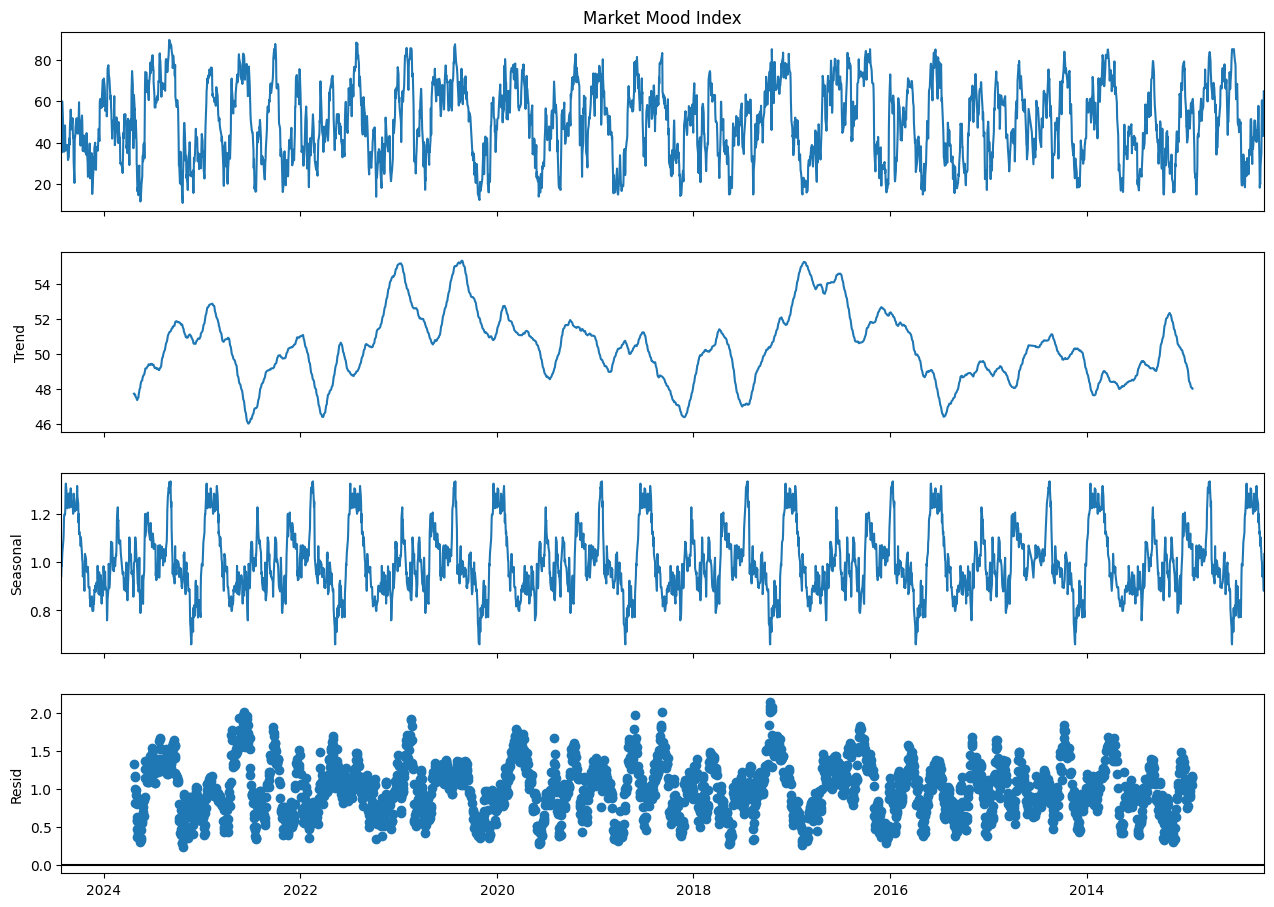

In [4]:
decomposition = seasonal_decompose(data['Market Mood Index'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

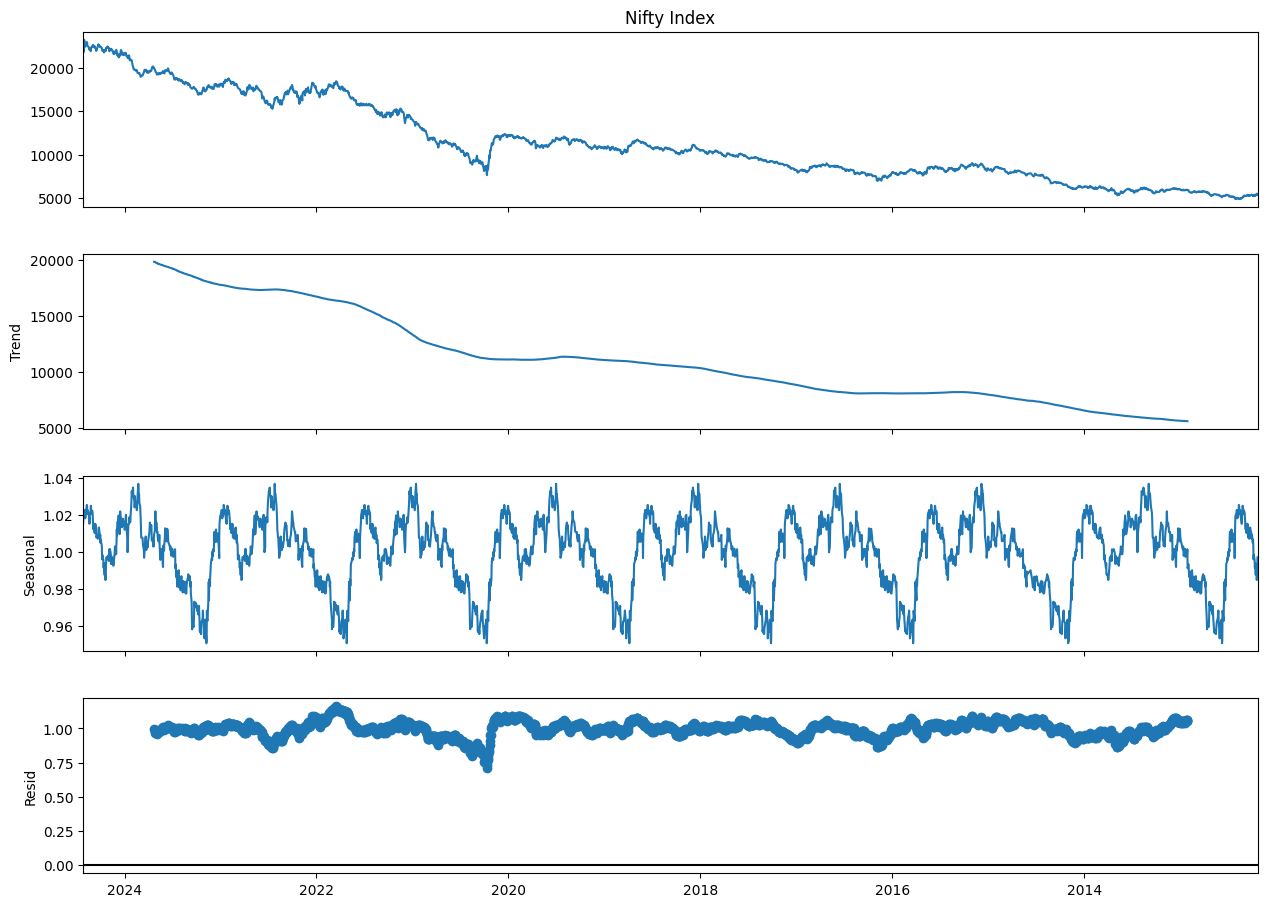

In [5]:
decomposition = seasonal_decompose(data['Nifty Index'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## Moving Averages

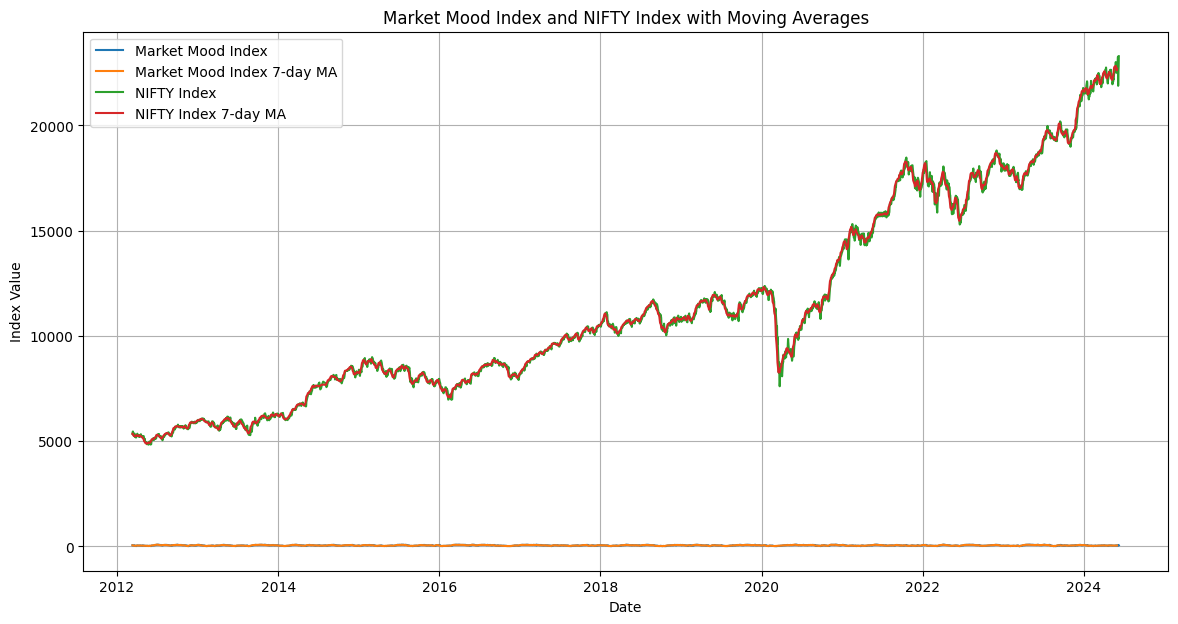

In [6]:
data['MMI_7d_MA'] = data['Market Mood Index'].rolling(window=7).mean()
data['NIFTY_7d_MA'] = data['Nifty Index'].rolling(window=7).mean()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Market Mood Index'], label='Market Mood Index')
plt.plot(data.index, data['MMI_7d_MA'], label='Market Mood Index 7-day MA')
plt.plot(data.index, data['Nifty Index'], label='NIFTY Index')
plt.plot(data.index, data['NIFTY_7d_MA'], label='NIFTY Index 7-day MA')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.title('Market Mood Index and NIFTY Index with Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

## Autocorrelation Analysis

<Figure size 1000x600 with 0 Axes>

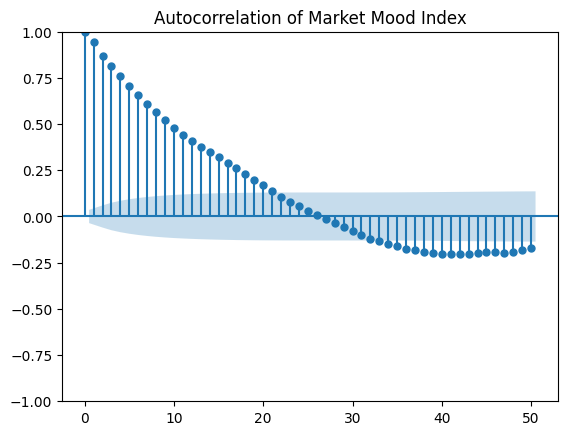

In [7]:
plt.figure(figsize=(10, 6))
plot_acf(data['Market Mood Index'].dropna(), lags=50)
plt.title('Autocorrelation of Market Mood Index')
plt.show()

<Figure size 1000x600 with 0 Axes>

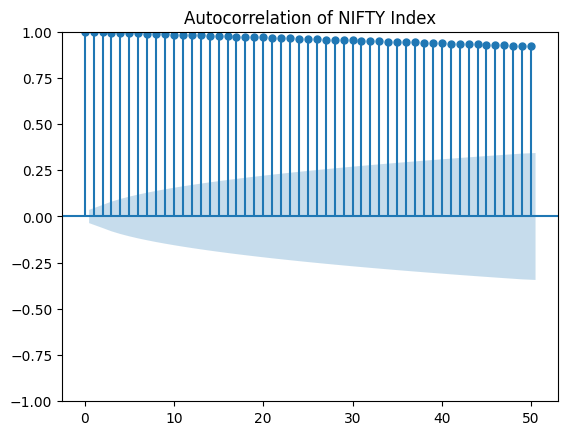

In [8]:
plt.figure(figsize=(10, 6))
plot_acf(data['Nifty Index'].dropna(), lags=50)
plt.title('Autocorrelation of NIFTY Index')
plt.show()